In [40]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import groupby
from operator import itemgetter
from CustomFunctions import DetailedBalance

In [66]:
#get directories and open separated datasets

time_interval = 10 #sec/frame

datadir = 'E:/Aaron/Combined_37C_Confocal_PCA_smooth/Data_and_Figs/'
savedir = datadir + 'alldata/'
if not os.path.exists(savedir):
    os.makedirs(savedir)

TotalFrame = pd.read_csv(datadir + 'Shape_Metrics_transitionPCbins.csv', index_col=0)

centers = pd.read_csv(datadir+'PC_bin_centers.csv', index_col=0)

nbins = np.max(TotalFrame[[x for x in TotalFrame.columns.to_list() if 'bin' in x]].to_numpy())

# make sure all categories are ordered
blebdates = [20240624,20240626,20240701,20241125,20241126,20241127]
TotalFrame.loc[TotalFrame[(TotalFrame.Date.isin(blebdates)) & (TotalFrame.Treatment == 'DMSO')].index,'Treatment'] = 'DMSO_Bleb'
ckdates = [20240610,20240617,20240620,20241205,20241209]
TotalFrame.loc[TotalFrame[(TotalFrame.Date.isin(ckdates)) & (TotalFrame.Treatment == 'DMSO')].index,'Treatment'] = 'DMSO_CK666'
#get only the random and dmso
df = TotalFrame[TotalFrame.Treatment.isin(['Random','DMSO_Bleb','DMSO_CK666'])]
df['Date'] = df.Date.astype(str)

C:\ProgramData\anaconda3\envs\abhishape\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


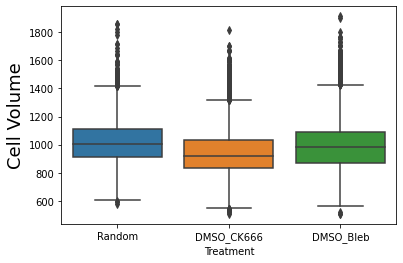

In [46]:
#############  INDIVIDUAL VOLUMES ##################
sns.boxplot(data = df, x = 'Treatment',y = 'Cell_Volume')
plt.ylabel('Cell Volume', fontsize = 18)
plt.savefig(savedir+'DMSOs Cell Volume.png', bbox_inches='tight', dpi = 500)


In [41]:
stat.reset_index()

,index,Treatment,CellID,avg,st,val
0,0,DMSO_Bleb,20240624_488EGFP-CAAX_01perDMSO_37C_1_cell_0,915.571446,33.318084,values
1,1,DMSO_Bleb,20240624_488EGFP-CAAX_01perDMSO_37C_1_cell_12,1052.670193,51.199409,values
2,2,DMSO_Bleb,20240624_488EGFP-CAAX_01perDMSO_37C_1_cell_13,703.974802,16.852217,values
3,3,DMSO_Bleb,20240624_488EGFP-CAAX_01perDMSO_37C_1_cell_14,973.227619,77.366041,values
4,4,DMSO_Bleb,20240624_488EGFP-CAAX_01perDMSO_37C_1_cell_16,1434.810775,86.377648,values
...,...,...,...,...,...,...
880,880,Random,20231122_488EGFP-CAAX_3mA_37C_2_cell_76,1245.417801,41.770232,values
881,881,Random,20231122_488EGFP-CAAX_3mA_37C_2_cell_78,1156.359817,50.191879,values
882,882,Random,20231122_488EGFP-CAAX_3mA_37C_2_cell_9,1140.073191,72.024876,values
883,883,Random,20231122_488EGFP-CAAX_3mA_37C_2_cell_90,1386.506170,NaN,values


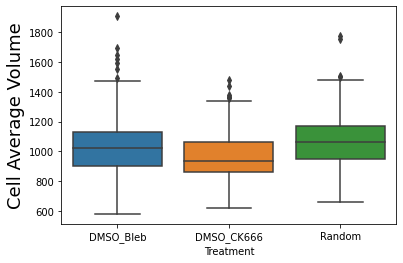

In [47]:
############ AVERAGE CELL VOLUMES ##################
stat = df.groupby(['Treatment','CellID']).mean()['Cell_Volume']
std = df.groupby(['Treatment','CellID']).std()['Cell_Volume']
values = ['values'] * len(stat)
stat = pd.DataFrame({'avg':stat,'st':std,'val':values}).reset_index()

sns.boxplot(data = stat,x = 'Treatment', y='avg')
plt.ylabel('Cell Average Volume', fontsize = 18)
plt.savefig(savedir+'DMSOs Cell Average Volume.png', bbox_inches='tight', dpi = 500)



In [49]:
########### linearize random untreated data and animate them
from CustomFunctions import linear_cycle_utils

whichpcs = [1,7]
origin = [7, 7]
binrange = 20
direction = 'clockwise'
zerostart = 'left'


#### linearize cycle in CGPS
angframe = linear_cycle_utils.linearize_cycle_continuous(
            df, 
            centers,
            origin, 
            whichpcs,
            zerostart,)

angframe =  linear_cycle_utils.bin_angular_coord(
        angframe,
        whichpcs,
        direction,
        binrange,
        )


C:\ProgramData\anaconda3\envs\abhishape\lib\site-packages\CustomFunctions\linear_cycle_utils.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'PC{whichpcs[0]}_PC{whichpcs[1]}_Continuous_Radial_Coord'] = np.sqrt((x**2) + (y**2))
C:\ProgramData\anaconda3\envs\abhishape\lib\site-packages\CustomFunctions\linear_cycle_utils.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'PC{whichpcs[0]}_PC{whichpcs[1]}_Continuous_Angular_Coord'] = [angle360(x1, y1) for x1, y1 in zip(x, y)]
C:\ProgramData\anacon

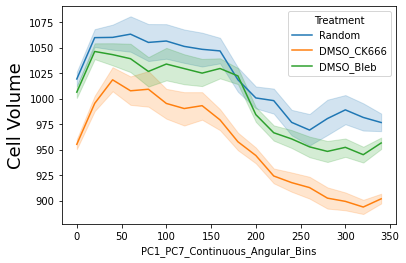

In [53]:
############# LINEAR CYCLE VOLUMES  ###################

sns.lineplot(data = angframe, x = f'PC{whichpcs[0]}_PC{whichpcs[1]}_Continuous_Angular_Bins',y = 'Cell_Volume',
            hue = 'Treatment')
plt.ylabel('Cell Volume', fontsize = 18)
plt.savefig(savedir+'DMSOs Cell Volume linear.png', bbox_inches='tight', dpi = 500)


C:\ProgramData\anaconda3\envs\abhishape\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='datetreat', ylabel='Cell_Volume'>

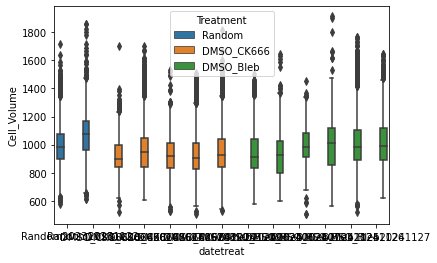

In [65]:
############ Individual cell volumes by Date ##############
df['datetreat'] = df.Treatment + df.Date.astype(str)
sns.boxplot(data = df, x = 'datetreat',y = 'Cell_Volume', hue = 'Treatment')

Text(0, 0.5, 'Cell Average Volume')

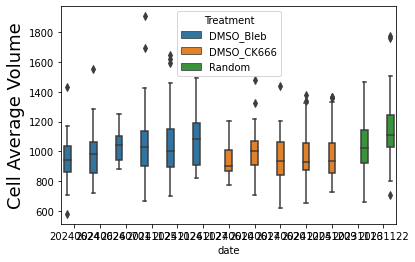

In [82]:
############ AVERAGE cell volumes by Date ##############
stat = df.groupby(['Treatment','CellID','Date']).mean().reset_index()['Cell_Volume']
std = df.groupby(['Treatment','CellID','Date']).std().reset_index()['Cell_Volume']
date = df.groupby(['Treatment','CellID','Date']).mean().reset_index()['Date']
treat = df.groupby(['Treatment','CellID','Date']).mean().reset_index()['Treatment']
values = ['values'] * len(stat)
stat = pd.DataFrame({'avg':stat,'st':std,'val':values,'date':date,'Treatment':treat})

sns.boxplot(data = stat,x = 'date', y='avg',hue = 'Treatment')
plt.ylabel('Cell Average Volume', fontsize = 18)
# plt.savefig(savedir+'DMSOs Cell Average Volume.png', bbox_inches='tight', dpi = 500)
